# Hebb則と線形ニューロンモデル
## Hebb則

Hebb_1949_The_Organization_of_Behavior

```{note}
日本語訳されている：行動の機構――脳メカニズムから心理学へ
```

> Let us assume then that the persistence or repetition of a reverberatory activity (or "trace") tends to induce lasting cellular changes that add to its stability The assumption' can be precisely stated as follows When an axon of cell A is near enough to excite a cell B and repeatedly or persistently takes part in firing It, some growth process or metabolic change takes place sn one or both cells such that A's efficiency, as one of the cats firing B, is increased

Hebb則はShatzにより"cells that fire together wire together" (共に活動する細胞は共に結合する)と韻を踏みながら短く言い換えられている．

> Shatz, C. J. 1992. “The Developing Brain.” Scientific American 267 (3): 60–67.

数式でHebb則を表してみよう．シナプス前活動を$\mathbf{x}\in \mathbb{R}^n$, 後活動を$\mathbf{y}\in \mathbb{R}^m$, 重み行列を$\mathbf{W}\in \mathbb{R}^{m\times n}$とし，$\mathbf{y}=\mathbf{W}\mathbf{x}$が成り立つとする．このようなモデルを線形ニューロンモデル (Linear neuron model)という．このとき，Hebb則は

$$
\frac{d\mathbf{W}}{dt}=\mathbf{y}\mathbf{x}^\top=(\text{post})\cdot (\text{pre})^\top
$$

として表される．

このHebb則は数学的に導出されたものではないが，特定の目的関数を神経活動及び重みを変化させて最適化するようなネットワークを構築すれば自然に出現する (本書ではこれに該当するIsingモデル，Amari-Hopfieldモデル，Boltzmannマシン，スパース符号化モデル，予測符号化モデルを取り上げる．もちろんこれ以外のモデルでも現れる)．こうしたモデルでは，先に目的関数$\mathcal{L}$を定義し，その目的関数を最小化するような神経活動$\mathbf{z}$および重み行列$\mathbf{W}$のダイナミクスをそれぞれ,

$$
\frac{d \mathbf{z}}{dt}\propto-\frac{\partial \mathcal{L}}{\partial \mathbf{z}},\ \frac{d \mathbf{W}}{dt}\propto-\frac{\partial \mathcal{L}}{\partial \mathbf{W}}
$$

として導出する．また，先に神経細胞の活動ダイナミクスを定義し，積分することで目的関数$\mathcal{L}$を導出できる(Isomura et al., 2022)．この場合，$\mathcal{L}$を重み行列で微分することでHebb則が導出できる．次のような連続時間線形ニューロンモデルを考えよう (記号は先ほどと同様である)．

$$
\frac{d\mathbf{y}}{dt}=\mathbf{W}\mathbf{x}
$$

ここで$\dfrac{\partial\mathcal{L}}{\partial\mathbf{y}}:=-\dfrac{d\mathbf{y}}{dt}$となるような目的関数 $\mathcal{L}\in \mathbb{R}$を仮定すると，

$$
\mathcal{L}=-\int \mathbf{W}\mathbf{x}\ d\mathbf{y}=-\mathbf{y}^\top \mathbf{W}\mathbf{x}
$$

となる．これをさらに$\mathbf{W}$で微分すると，

$$
\dfrac{\partial\mathcal{L}}{\partial\mathbf{W}}=-\mathbf{y}\mathbf{x}^\top\Rightarrow
\frac{d\mathbf{W}}{dt}=-\dfrac{\partial\mathcal{L}}{\partial\mathbf{W}}=\mathbf{y}\mathbf{x}^\top
$$

となり，Hebb則が導出できる．

また実験的にはLTPとして Bliss and Lømo (1973)により発見されている．

## Hebb則の安定化
- Hebb則は相関ベースの学習とも言える．ただし，正のフィードバックにより不安定化する．"
- 線形変換は$w$と$x$を正規化すれば，$wx$でcosine類似度を計算していると言える．
- 恒常的可塑性 (synaptic scaling)により安定化しているという説がある．
> Turrigiano, Gina G. 2008. “The Self-Tuning Neuron: Synaptic Scaling of Excitatory Synapses.” Cell 135 (3): 422–35.
- しかし，この過程は遅すぎるため，Hebb則の不安定化を安定化するに至らない．
> Zenke, Friedemann, Wulfram Gerstner, and Surya Ganguli. 2017. “The Temporal Paradox of Hebbian Learning and Homeostatic Plasticity.” Current Opinion in Neurobiology 43 (April): 166–76.


## 主成分分析 (Principal component analysis; PCA)

主成分分析の解説書く．SVDでの実装．

In [1]:
using PyPlot, Random, Distributions, LinearAlgebra
rc("axes.spines", top=false, right=false)

In [2]:
d = MvNormal([0,0], [1.0 0.5; 0.5 1.0]) # multivariate normal distribution
N = 300 # sample size
Random.seed!(0) # set seed
X = rand(d, N)  # generate toy data

2×300 Matrix{Float64}:
 0.942971  1.52507   -1.20577   …  -1.33405    -0.0682456  1.10984
 0.587466  0.869836  -0.332845     -0.0347524   0.0516093  0.574491

In [3]:
U, S, V = svd(X*X')

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
2×2 Matrix{Float64}:
 -0.722509  -0.691362
 -0.691362   0.722509
singular values:
2-element Vector{Float64}:
 418.9073852600819
 138.22321877667497
Vt factor:
2×2 Matrix{Float64}:
 -0.722509  -0.691362
 -0.691362   0.722509

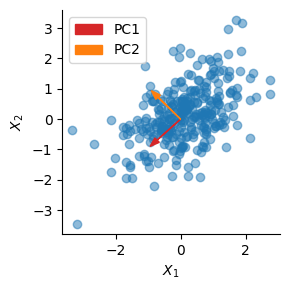

In [4]:
figure(figsize=(3,3))
scatter(X[1,:], X[2,:], alpha=0.5)
arrow(0, 0, V[1,1], V[2,1], head_width=0.2, label="PC1", color="tab:red")
arrow(0, 0, V[1,2], V[2,2], head_width=0.2, label="PC2", color="tab:orange")
xlabel(L"$X_1$"); ylabel(L"$X_2$")
legend(); tight_layout()

## Oja則
単一の出力を持つ線形ニューロンを仮定する．

$$
y = \mathbf{w}^\top \mathbf{x}=\mathbf{x}^\top \mathbf{w}
$$

ここで$\mathbf{x}\in \mathbb{R}^d, \mathbf{w}\in \mathbb{R}^d, y\in \mathbb{R}$である．$\eta$を学習率とすると，

$$
\mathbf{w}\leftarrow\frac{\mathbf{w}+\eta \mathbf{x}y}{\|\mathbf{w}+\eta \mathbf{x}y\|}
$$

とすれば正規化できる．ここで，$f(\eta):=\dfrac{\mathbf{w}+\eta \mathbf{x}y}{\|\mathbf{w}+\eta \mathbf{x}y\|}$とし，$\eta=0$においてTaylor展開を行うと，

$$
\begin{aligned}
f(\eta)&\approx f(0) + \eta \left.\frac{df(\eta^*)}{d\eta^*}\right|_{\eta^*=0} + \mathcal{O}(\eta^2)\\
&=\frac{\mathbf{w}}{\|\mathbf{w}\|} + \eta \left(\frac{\mathbf{x}y}{\|\mathbf{w}\|}-\frac{y^2\mathbf{w}}{\|\mathbf{w}\|^3}\right)+ \mathcal{O}(\eta^2)\\
\end{aligned}
$$

ここで$\|\mathbf{w}\|=1$として，1次近似すれば

$$
\mathbf{w}\leftarrow \mathbf{w} + \eta \left(\mathbf{x}y-y^2 \mathbf{w}\right)
$$

となる．これを**Oja則 (Oja's rule)** と呼ぶ {cite:p}`ojahoge`．

重みの変化量を$\Delta \mathbf{w}$とし，その期待値を取る．

$$
\begin{aligned}
\Delta \mathbf{w} &= \eta \left(\mathbf{x}y - y^2 \mathbf{w}\right)\\
&=\eta \left(\mathbf{x}\mathbf{x}^\top \mathbf{w} - \left[\mathbf{w}^\top \mathbf{x}\mathbf{x}^\top \mathbf{w}\right] \mathbf{w}\right)\\
\mathbb{E}\left[\Delta \mathbf{w}\right] &= \eta \left(\mathbf{C} \mathbf{w} - \left[\mathbf{w}^\top \mathbf{C} \mathbf{w}\right] \mathbf{w}\right)\\
\end{aligned}
$$

$\mathbf{C}:=\mathbb{E}[\mathbf{x}\mathbf{x}^\top]\in \mathbb{R}^{d\times d}$とする．$\mathbf{x}$の平均が0の場合，$\mathbf{C}$は分散共分散行列である．$\mathbb{E}\left[\Delta \mathbf{w}\right]=0$となる$\mathbf{w}$が収束する固定点(fixed point)では次の式が成り立つ．

$$
\mathbf{C}\mathbf{w} = \lambda \mathbf{w}
$$

これは固有値問題であり，$\lambda:=\mathbf{w}^\top \mathbf{C} \mathbf{w}$は固有値，$\mathbf{w}$は固有ベクトル(eigen vector)になる．

ここでサンプルサイズを$n$とし，$\mathbf{X} \in \mathbb{R}^{d\times n}, \mathbf{y}=\mathbf{X}^\top\mathbf{w} \in \mathbb{R}^n$とする．標本平均で近似して$\mathbf{C}\simeq \mathbf{X}\mathbf{X}^\top$とする．この場合，

$$
\begin{aligned}
\mathbb{E}\left[\Delta \mathbf{w}\right] &\simeq \eta \left(\mathbf{X}\mathbf{X}^\top \mathbf{w} - \left[\mathbf{w}^\top \mathbf{X}\mathbf{X}^\top \mathbf{w}\right] \mathbf{w}\right)\\
&=\eta \left(\mathbf{X}\mathbf{y} - \left[\mathbf{y}^\top\mathbf{y}\right] \mathbf{w}\right)
\end{aligned}
$$

となる．

In [5]:
w = randn(2) # initialize weight
w ./= sqrt.(sum(w.^2)) # L2 normalize
initw = copy(w) # save initial weight
η = 1e-3 # learning rate
for _ in 1:200
    y = X' * w  
    w += η * (X * y - y' * y * w) # Oja's rule
end

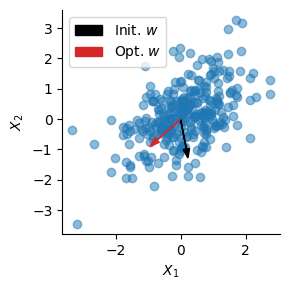

In [6]:
figure(figsize=(3,3))
scatter(X[1,:], X[2,:], alpha=0.5)
arrow(0,0,initw[1],initw[2], head_width=0.2, color="k", label=L"Init. $w$")
arrow(0,0,w[1],w[2], head_width=0.2, color="tab:red", label=L"Opt. $w$")
xlabel(L"$X_1$"); ylabel(L"$X_2$")
tight_layout()
legend(); tight_layout()

$q$個の複数出力を持つ場合を考えよう．重み行列を$\mathbf{W} \in \mathbb{R}^{q\times d}$, 出力を$\mathbf{y}=\mathbf{W}\mathbf{x} \in \mathbb{R}^{q}, \mathbf{Y}=\mathbf{W}\mathbf{X} \in \mathbb{R}^{q\times n}$とする．この場合の更新則は

$$
\begin{align}
\Delta \mathbf{W} &= \eta \left(\mathbf{y}\mathbf{x}^\top - \mathrm{Diag}\left[\mathbf{y}\mathbf{y}^\top\right] \mathbf{W}\right)\\
\mathbb{E}\left[\Delta \mathbf{W}\right] &\simeq \eta \left(\mathbf{Y}\mathbf{X}^\top - \mathrm{Diag}\left[\mathbf{Y}\mathbf{Y}^\top\right] \mathbf{W}\right)\\
\end{align}
$$

となる．ただし，$\mathrm{Diag}(\cdot)$は行列の対角成分からなる対角行列を生み出す作用素である．


In [7]:
W = randn(2, 2) # initialize weight
W ./= sqrt.(sum(W.^2, dims=2)) # normalize
initW = copy(W) # save initial weight
for _ in 1:200
    Y = W * X
    W += η * (Y * X' - Diagonal(Y * Y') * W) # Oja's rule
end

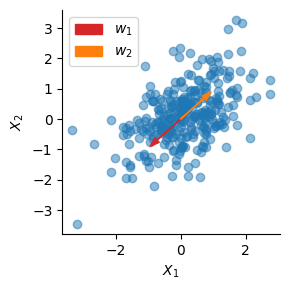

In [8]:
figure(figsize=(3,3))
scatter(X[1,:], X[2,:], alpha=0.5)
arrow(0, 0, W[1,1], W[1,2], head_width=0.2, label=L"$w_1$", color="tab:red")
arrow(0, 0, W[2,1], W[2,2], head_width=0.2, label=L"$w_2$", color="tab:orange")
xlabel(L"$X_1$"); ylabel(L"$X_2$")
legend(); tight_layout()

PCAのように直交はしない．工夫が必要となる．

## Sanger則
**Sanger則 (Sanger's rule)**，あるいは**一般化Hebb則 (generalized Hebbian algorithm; GHA)** は，Oja則を複数の出力を持つニューロンに拡張したものである．Oja則ではPCAの第1主成分しか求めることができなかったが，Sanger則を用いれば第2主成分以降も求めることができる．PCAでは各主成分ベクトルは直交するという拘束条件があるが，Gram–Schmidtの直交化法(Gram–Schmidt orthonormalization)を学習則に取り入れることでPCAを実現している．

$$
\Delta \mathbf{W} = - \mathrm{lower}\left[\mathbf{W}\mathbf{W}^\top\right] \mathbf{W}
$$

$\mathrm{lower}(\cdot)$は行列の対角成分を含め上側の要素を0にした行列を作り出す作用素である．この過程では$\mathbf{W}$の各行は直交化されるが，正規化はされない．

Gram–Schmidtの正規直交化法とOja則を組み合わせたのがSanger則であり，

$$
\Delta \mathbf{W} = \eta \left(\mathbf{y}\mathbf{x}^\top - \mathrm{LT}\left[\mathbf{y}\mathbf{y}^\top\right] \mathbf{W}\right)
$$

$\mathrm{LT}(\cdot)$は行列の対角成分より上側の要素を0にした下三角行列(lower triangular matrix)を作り出す作用素である．

In [9]:
W = randn(2, 2) # initialize weight
W ./= sqrt.(sum(W.^2, dims=2)) # normalize
initW = copy(W) # save initial weight
for _ in 1:200
    Y = W * X
    W += η * (Y * X' - LowerTriangular(Y * Y') * W) # Sanger's rule
end

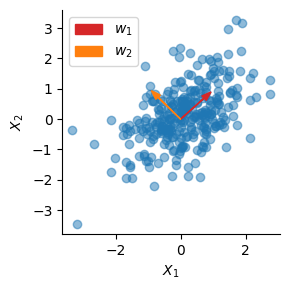

In [10]:
figure(figsize=(3,3))
scatter(X[1,:], X[2,:], alpha=0.5)
arrow(0, 0, W[1,1], W[1,2], head_width=0.2, label=L"$w_1$", color="tab:red")
arrow(0, 0, W[2,1], W[2,2], head_width=0.2, label=L"$w_2$", color="tab:orange")
xlabel(L"$X_1$"); ylabel(L"$X_2$")
legend(); tight_layout()

In [11]:
M = randn(3, 4) # initialize weight
M ./= sqrt.(sum(M.^2, dims=2)) # normalize

3×4 Matrix{Float64}:
 -0.0619562  -0.614706   0.484408  -0.619393
  0.668181   -0.457111  -0.55211    0.199396
  0.181162    0.321738   0.866893   0.334905

In [12]:
sqrt.(sum(M.^2, dims=2))

3×1 Matrix{Float64}:
 1.0
 1.0
 1.0

In [13]:
M[1, :]' * M[2, :]

-0.1513597963264096

In [14]:
for _ in 1:200
    C = M * M'
    M -= (LowerTriangular(C)- Diagonal(C)) * M # Sanger's rule
end

In [15]:
M

3×4 Matrix{Float64}:
 -0.0619562  -0.614706    0.484408  -0.619393
  0.658803   -0.550153   -0.47879    0.105645
  0.476251    0.0776434   0.6509     0.384354

In [16]:
sqrt.(sum(M.^2, dims=2))

3×1 Matrix{Float64}:
 1.0
 0.9884787362690346
 0.8967955692251022

In [17]:
M[:, 1]' * M[:, 2]

-0.2873796669952835

In [18]:
M[1, :]' * M[2, :]

0.0

In [19]:
M[2, :]' * M[3, :]

1.3877787807814457e-17

## 参考文献
```{bibliography}
:filter: docname in docnames
```